In [191]:
import numpy as np
from numpy import array, dot, cos, sin, radians, zeros, identity, ones,sqrt, cov, argsort
from numpy.linalg import eigh, svd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris, load_digits
from sklearn.decomposition import PCA
import pandas as pd
%matplotlib inline

In [2]:
A = array([[2,0],[0,1]])

In [3]:
print(A)


[[2 0]
 [0 1]]


In [4]:
w = array([0.5,0.5])


In [5]:
v = A.dot(w)
v = A.dot(v)
print(v)

[2.  0.5]


In [6]:
L, V = eigh(A)

In [7]:
print(L)
print(V)

[1. 2.]
[[0. 1.]
 [1. 0.]]


Calculando la matriz de rotación, con $\theta = 45$

In [8]:
theta = radians(45)
M = array([[cos(theta), -sin(theta)],[sin(theta), cos(theta)]])
print(M)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [9]:
W = [ array([0,1]), array([1,0])]
Wt = []
for w in W:
    Wt.append(M.dot(w))


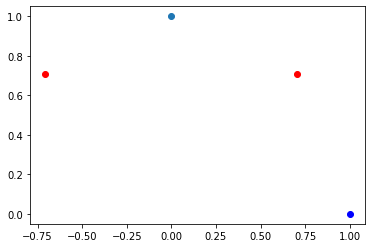

In [10]:
plt.scatter(W[0][0], W[0][1])
plt.scatter(W[1][0], W[1][1],c='b')
plt.scatter(Wt[0][0], Wt[0][1], c='r')
plt.scatter(Wt[1][0], Wt[1][1], c='r')

In [11]:
L, V = eigh(M)
print(L)
print(V)

[1.11022302e-16 1.41421356e+00]
[[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


# PCA

El análisis de componentes principales expresa la matriz de datos en términos de las componentes en que más varían estos expresado por la matriz de covarinza. Se encuentran los eigenvectores de esta matriz y se ordena del eigenvalor más grande al más pequeño. Los datos originales son reexprexados como una combinación lineal de esta base. 


In [12]:
def pca(datos, dimens=2):
    m, n = datos.shape
    D = datos[:]; D -= datos.mean(axis=0)
    R = cov(D, rowvar=False)     #matriz de covarianza
    evals, evecs = eigh(R)       #eigenvectores de la matriz
    idx = argsort(evals)[::-1]   #ordenamos respecto del eigenvalor más grande
    evecs = evecs[:,idx]
    evals = evals[idx]
    evecs = evecs[:, :dimens]
    return dot(evecs.T, D.T).T, evals, evecs  #regresamos la proyección de los datos en nuevo espacio

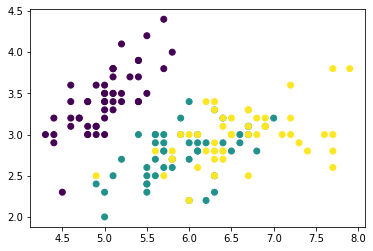

In [13]:
iris = load_iris()
data = iris['data']
etqs = iris['target']
plt.scatter(data[:,0], data[:,1], c=etqs)

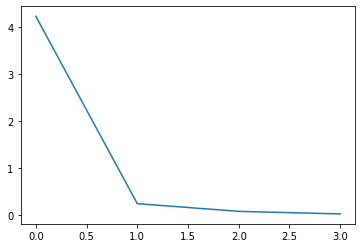

In [19]:
D, V, E = pca(data,2) #hacemos pca a iris y obtenemos los datos en un espacio de dim 2
plt.plot(V)

In [21]:
etqs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

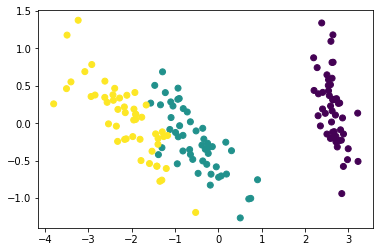

In [20]:
D = P[0] #recuperamos los datos proyectatos
plt.scatter(D[:,0], D[:,1], c=etqs)

In [31]:
red = PCA(n_components=4)
K = red.fit_transform(data)

Text(0.5, 1.0, 'Varianza acumulada')

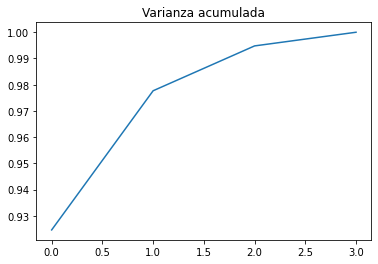

In [37]:
plt.plot(red.explained_variance_ratio_.cumsum())
plt.title("Varianza acumulada")

Text(0.5, 1.0, 'PCA de Iris')

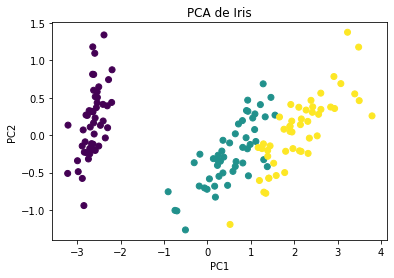

In [38]:
plt.scatter(K[:,0], K[:,1], c= etqs)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA de Iris")

3


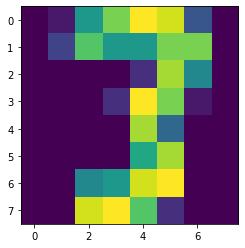

In [42]:
digitos = load_digits()
datos = digitos['data']
target = digitos['target']
idx = 23
plt.imshow(datos[idx].reshape((8,8)))
print(target[idx])

In [46]:
digitspca = PCA(n_components=64)
digtospca = digitspca.fit_transform(datos)

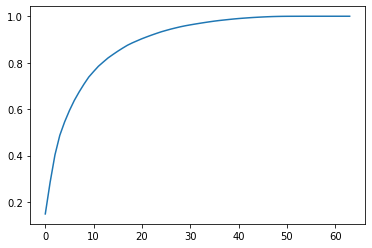

In [48]:
plt.plot(digitspca.explained_variance_ratio_.cumsum())

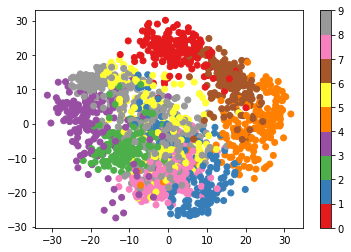

In [54]:
plt.scatter(digtospca[:,0], digtospca[:,1], c=target, cmap='Set1')
plt.colorbar()

In [50]:
set(target)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

# PCoA

El análisis de coordenadas principales usa el mismo principio que PCA sólo que en vez de ocupar una matriz de correlación ocupa la distancia entre los puntos para reconstruir las coordenadas "originales" que respeten esas distancias

### 1. Generamos la matriz de distancia D

In [69]:
D = zeros((4,4))
D[1,0] = D[0,1] = 93
D[2,0] = D[0,2] = 82
D[3,0] = D[0,3] = 133
D[1,2] = D[2,1] = 52
D[1,3] = D[3,1] = 60
D[2,3] = D[3,2] = 111
print(D)

[[  0.  93.  82. 133.]
 [ 93.   0.  52.  60.]
 [ 82.  52.   0. 111.]
 [133.  60. 111.   0.]]


### 2. Elevamos al cuadrado

Vamos a usar las distancias al cuadrado para después (doble) centrarlas 

In [113]:
sD = D**2
print(sD)

[[    0.  8649.  6724. 17689.]
 [ 8649.     0.  2704.  3600.]
 [ 6724.  2704.     0. 12321.]
 [17689.  3600. 12321.     0.]]


### 3.Calculamos J 


Vamos a usar la matriz $C$ que denominaremos matriz de centrado. Esta matriz como a la identidad y a $J_4$ que es una matriz de unos

$$C = I - \frac{1}{4}Jn$$

In [114]:
n=4
C = identity(n) - ones((n,n)) / n
print (C)

[[ 0.75 -0.25 -0.25 -0.25]
 [-0.25  0.75 -0.25 -0.25]
 [-0.25 -0.25  0.75 -0.25]
 [-0.25 -0.25 -0.25  0.75]]


### 4. Obtenemos B


La matriz B es la matriz doblemente centrada que toma a la matriz de distancia y a la matriz $J_n$ recién calculada.
$$ B = -\frac{1}{2} C D^2 C$$

In [115]:
B = -0.5 * C @ sD @ C
print(B)

[[ 5035.0625 -1553.0625   258.9375 -3740.9375]
 [-1553.0625   507.8125     5.3125  1039.9375]
 [  258.9375     5.3125  2206.8125 -2471.0625]
 [-3740.9375  1039.9375 -2471.0625  5172.0625]]


### 5. Eigendescomposición de B

Sobre la matriz $B$ es que hacemos la descomposición en eigenvectores y eigenvalores. Los ordenamos de mayor a menor y nos quedamos con $m$ componentes.

In [123]:
evals, evecs = eigh(B)
idx = argsort(evals)[::-1]
print(idx)
nvals = evals[idx]
nvecs = evecs[:,idx]


[3 2 1 0]


### 6. Obtenemos X usando m componentes
$$ X = E_m \Lambda_m $$

In [174]:
prin_comp = nvecs[:, :2]
prin_comp

array([[-0.63715969,  0.58649822],
       [ 0.18662069, -0.21391682],
       [-0.25311714, -0.70631521],
       [ 0.70365614,  0.33373381]])

In [233]:
def pcoa_torgerson(distancias, escalado=True):
    """
    Calcula PCoA a partir de la matriz de 
    distancias con el método de Torgerson

    Parametros
        - distancias: numpy 2D array

    Regresa:
        - Coordenadas principales
    """
    n = len(distancias)
    H = np.eye(n) - np.ones((n, n)) / n
    B = -0.5 * H @ distancias**2 @ H

    # Eigenvalue decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(B)

    # Ordenamos eigenvalores de mayor a menor
    order = np.argsort(eigenvalues)[::-1]
    evalores = eigenvalues[order]
    evectores = eigenvectors[:, order]

    # Nos quedamos con las componentes principales
    pr_coord = evectores[:, :min(n - 1, evectores.shape[1])]
    if(escalado):
         pr_coord *= (evalores[:min(n-1, evectores.shape[1])])

        
    return pr_coord

D = np.array([[0, 1, 2, 5], [1, 0, 3 ,2], [2, 3, 0, 6], [5, 2, 6, 0]])
coords = pcoa_torgerson(D)

print("Coordenadas")
print(D)
print(coords)


Coordenadas
[[0 1 2 5]
 [1 0 3 2]
 [2 3 0 6]
 [5 2 6 0]]
[[-6.62950997e+00  1.12271179e+00  5.61426990e-16]
 [ 2.86303341e+00  2.26164967e-01  5.61426990e-16]
 [-1.17865962e+01 -1.01591170e+00  5.61426990e-16]
 [ 1.55530727e+01 -3.32965060e-01  5.61426990e-16]]


[-6.62950997e+00  1.12271179e+00  5.61426990e-16]
[2.86303341e+00 2.26164967e-01 5.61426990e-16]
[-1.17865962e+01 -1.01591170e+00  5.61426990e-16]
[ 1.55530727e+01 -3.32965060e-01  5.61426990e-16]


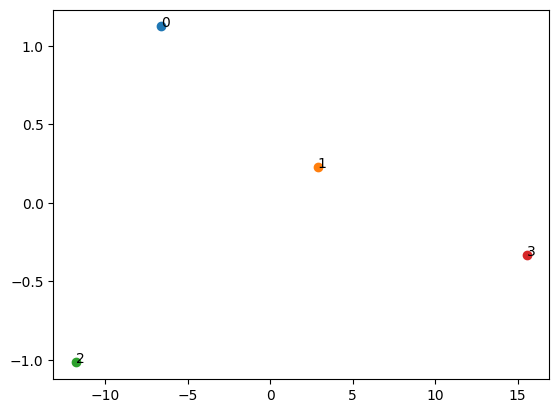

In [239]:
for i,x in enumerate(coords):
    print(x)
    plt.scatter(x[0], x[1])
    plt.annotate(xy=(x[0],x[1]), text=i)


## Ejemplo con perfiles IM

In [240]:
distancias = pd.read_csv('distancias.csv')
D = distancias.loc[:,distancias.columns[1:]].to_numpy()
distancias

,Unnamed: 0,sc 9,sc 5,sc 3,mX,m 17,m 14,hX,h 17,h 14,ce 3,ce 2,ce 1
0,sc 9,0.000,0.018,0.017,0.512,0.485,0.513,0.549,0.539,0.536,0.377,0.373,0.355
1,sc 5,0.018,0.000,0.016,0.446,0.418,0.450,0.483,0.469,0.469,0.312,0.309,0.291
2,sc 3,0.017,0.016,0.000,0.459,0.433,0.461,0.496,0.485,0.483,0.339,0.334,0.317
3,mX,0.512,0.446,0.459,0.000,0.009,0.015,0.046,0.055,0.056,0.205,0.197,0.205
4,m 17,0.485,0.418,0.433,0.009,0.000,0.029,0.063,0.066,0.074,0.209,0.202,0.208
5,m 14,0.514,0.450,0.461,0.015,0.029,0.000,0.071,0.083,0.079,0.225,0.216,0.225
6,hX,0.549,0.483,0.496,0.046,0.063,0.071,0.000,0.003,0.002,0.197,0.186,0.199
7,h 17,0.539,0.469,0.485,0.055,0.066,0.083,0.003,0.000,0.004,0.189,0.179,0.189
8,h 14,0.536,0.469,0.483,0.056,0.074,0.079,0.002,0.004,0.000,0.188,0.178,0.189
9,ce 3,0.377,0.312,0.339,0.205,0.209,0.225,0.197,0.189,0.188,0.000,0.002,0.003


In [241]:
print(distancias.columns[1:])
colores = [1,1,1,2,2,2,3,3,3,4,4,4]
especies = {1:"S. cerevisiae", 2:"M musculus", 3:"H sapiens", 4:"C elegans"}
assert(len(colores)==len(distancias.columns[1:]))

Index(['sc 9', 'sc 5', 'sc 3', 'mX', 'm 17', 'm 14', 'hX', 'h 17', 'h 14',
       'ce 3', 'ce 2', 'ce 1'],
      dtype='object')


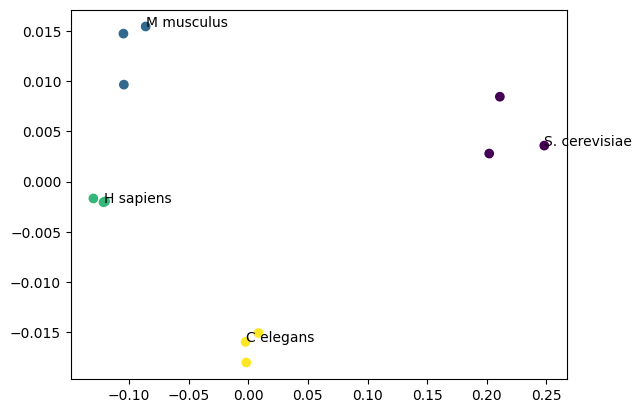

In [242]:
C = pcoa_torgerson(D, escalado=True)
coords = C[:,0:2].T

plt.scatter(coords[0], coords[1], c=colores, edgecolors=None)
nueva = True
actual = None
for i,color in enumerate(colores):
    coord = coords.T[i,0], coords.T[i,1]
    if(nueva):
        especie = especies[color]
        plt.annotate(xy = coord, text=especie)
        nueva = False
    else:
        nueva = False if actual==color else True
    actual = color
